<a href="https://colab.research.google.com/github/emmenets/neuralnetwork/blob/master/190816Einfuehrung_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2019-08-16 13:10:15--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  20.3MB/s    in 9.0s    

2019-08-16 13:10:24 (18.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [4]:
!tar -xvf /content/cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
class CifarLoader(object):
  def __init__(self, source_files):
    self._source = source_files
    self._i = 0
    self.images = None
    self.labels = None

  def load(self):
    data = [unpickle(f) for f in self._source]
    images = np.vstack([d[b"data"] for d in data])
    n = len(images)
    self.images = images.reshape(n, 3, 32, 32).transpose(0, 2, 3, 1).astype(float) / 255
    self.labels = one_hot(np.hstack([d[b"labels"] for d in data]), 10)
    return self

  def next_batch(self, batch_size):
    x, y = self.images[self._i:self._i+batch_size], self.labels[self._i:self._i+batch_size]
    self._i = (self._i + batch_size) % len(self.images)
    return x, y


In [0]:
DATA_PATH = '/content/cifar-10-batches-py'
def unpickle(file):
  with open(os.path.join(DATA_PATH, file), 'rb') as fo:
    dict = pickle.load(fo, encoding="bytes")
  return dict

def one_hot(vec, vals=10):
  n = len(vec)
  out = np.zeros((n, vals))
  out[range(n), vec] = 1
  return out

In [0]:
class CifarDataManager(object):
  def __init__(self):
    self.train = CifarLoader(["data_batch_{}".format(i)
    for i in range(1, 6)])\
    .load()
    self.test = CifarLoader(["test_batch"]).load()


Anzahl der Bilder zum Anlernen: 50000
Anzahl der Markierungen zum Anlernen: 50000
Anzahl der Bilder zum Testen: 10000
Anzahl der Markierungen zum Testen: 10000


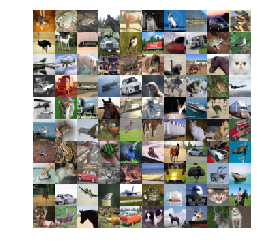

In [26]:
import pickle
def display_cifar(images, size):
  n = len(images)
  plt.figure()
  plt.gca().set_axis_off()
  im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)]) for i in range(size)])
  plt.imshow(im)
  plt.show()



d = CifarDataManager()
print("Anzahl der Bilder zum Anlernen: {}".format(len(d.train.images)))
print("Anzahl der Markierungen zum Anlernen: {}".format(len(d.train.labels)))
print("Anzahl der Bilder zum Testen: {}".format(len(d.test.images)))
print("Anzahl der Markierungen zum Testen: {}".format(len(d.test.labels)))
images = d.train.images
display_cifar(images, 10)

In [0]:
cifar = CifarDataManager()

x = tf.placeholder(tf.float32, shape=[None, 32, 32 3])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

keep_prob = tf.placeholder(tf.float32)

conv1 = conv_layer(x, shape=[5, 5, 3, 32])
conv1_pool = max_pool_2x2(conv1)

conv2 = conv_layer(conv1_pool, shape=[5, 5, 32, 64])
conv2_pool = max_pool_2x2(conv2)
conv2_flat = tf. reshape(conv2_pool, [-1, 8*8*64])

full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)

y_conv = 

keep_prob = tf.placeholder(tf.float32)

full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)

y_conv = full_layer(full1_drop, 10)